<a href="https://colab.research.google.com/github/Fer-2022/Investigaci-n-de-operaciones-/blob/main/Networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUTORIAL DE NETWORKX

## ¿Qué es un grafo?  

Un **grafo** se define como un par ordenado:  

\[
G = (V, E)
\]

donde:  
- \( V \) es el conjunto de **vértices o nodos**.  
- \( E \) es el conjunto de **aristas o enlaces** que conectan pares de nodos.  

Ejemplo: si tenemos \( V = \{A, B, C\} \) y \( E = \{(A,B), (B,C)\} \), el grafo conecta los nodos de forma lineal.


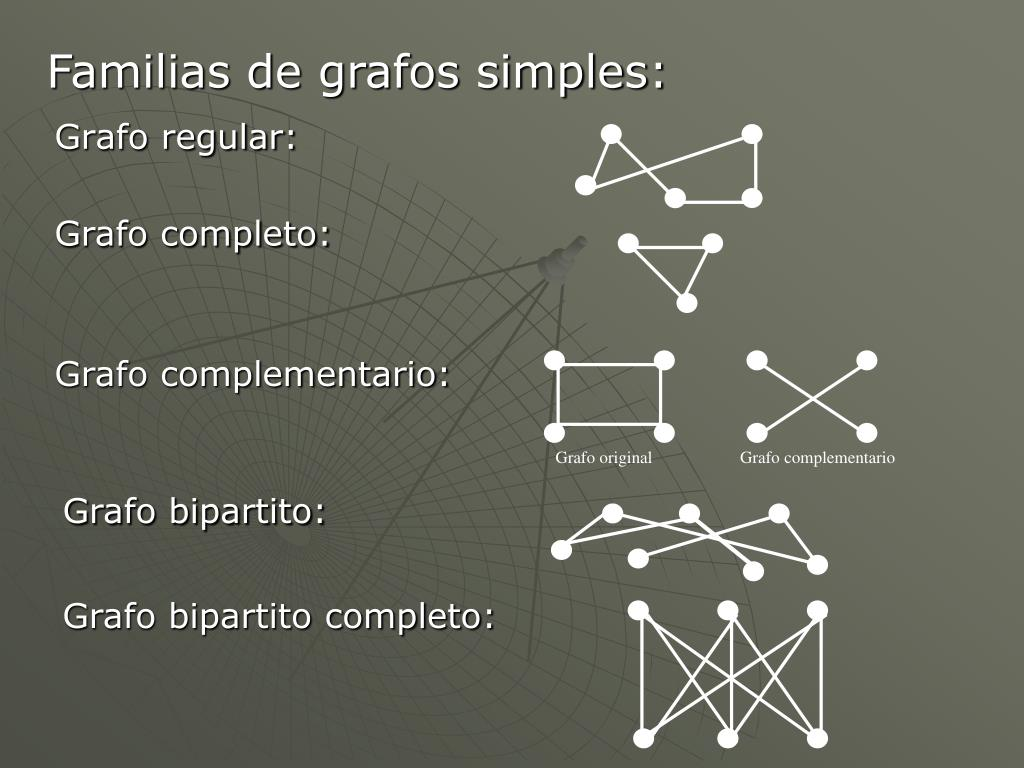


In [19]:
!pip install --quiet networkx matplotlib pandas

# Importaciones
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Opciones visuales (personalizables)
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

print("Versión networkx:", nx.__version__)


Versión networkx: 3.5


## 1) Creación de un grafo simple

Queremos construir el grafo:
\[
V=\{A,B,C,D\},\qquad E=\{(A,B),(A,C),(B,D),(C,D)\}
\]

Primero veremos la teoría mínima y luego el código para crear y visualizar el grafo.


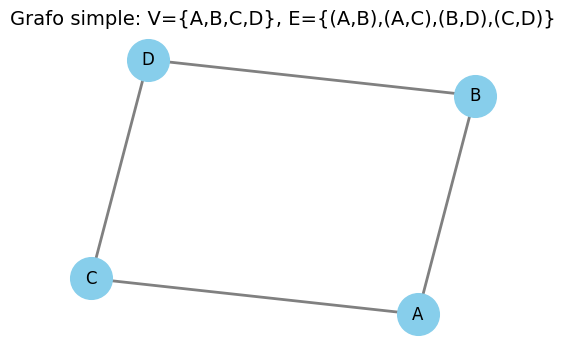

In [ ]:
# CELDA 5: Crear y dibujar el grafo simple
G = nx.Graph()  # grafo no dirigido

# Añadir nodos (puedes poner atributos)
G.add_nodes_from(["A","B","C","D"])

# Añadir aristas (edges)
G.add_edges_from([("A","B"), ("A","C"), ("B","D"), ("C","D")])

# Layout para posicionar nodos (spring_layout es estético)
pos = nx.spring_layout(G, seed=42)

# Dibujar: nodos, aristas y etiquetas con control visual
plt.figure(figsize=(6,4))
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=900)
nx.draw_networkx_edges(G, pos, width=2, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12)
plt.title("Grafo simple: V={A,B,C,D}, E={(A,B),(A,C),(B,D),(C,D)}")
plt.axis('off')
plt.show()


### Nodos, aristas y atributos

NetworkX permite agregar atributos tanto a nodos como a aristas.  
Ejemplo de uso: peso en una arista (para rutas), tipo de nodo, etiqueta, etc.

A continuación se muestra cómo añadir atributos y cómo consultarlos.


In [ ]:
# CELDA 7: Añadir y mostrar atributos
# Añadir atributos a nodos
G.nodes['A']['role'] = 'source'
G.nodes['B']['role'] = 'intermediate'
G.nodes['C']['role'] = 'intermediate'
G.nodes['D']['role'] = 'sink'

# Añadir atributo 'weight' (peso) a una arista (útil en caminos ponderados)
G.edges['A','B']['weight'] = 3.5
G.edges['A','C']['weight'] = 1.2
G.edges['B','D']['weight'] = 2.0
G.edges['C','D']['weight'] = 2.8

# Mostrar nodos con atributos
print("Nodos con atributos:")
for n, attrs in G.nodes(data=True):
    print(" -", n, attrs)

print("\nAristas con atributos:")
for u, v, attrs in G.edges(data=True):
    print(" -", (u, v), attrs)


Nodos con atributos:
 - A {'role': 'source'}
 - B {'role': 'intermediate'}
 - C {'role': 'intermediate'}
 - D {'role': 'sink'}

Aristas con atributos:
 - ('A', 'B') {'weight': 3.5}
 - ('A', 'C') {'weight': 1.2}
 - ('B', 'D') {'weight': 2.0}
 - ('C', 'D') {'weight': 2.8}


## 2) Tipos de grafos y grafos ponderados

- **Grafo dirigido**: `nx.DiGraph()` — se usan en redes de flujo, páginas web (links), citaciones.
- **Multigrafo**: `nx.MultiGraph()` o `nx.MultiDiGraph()` — permite aristas paralelas.
- **Grafo ponderado**: añadir atributo `weight` en la arista y usarlo en algoritmos (Dijkstra, etc.).


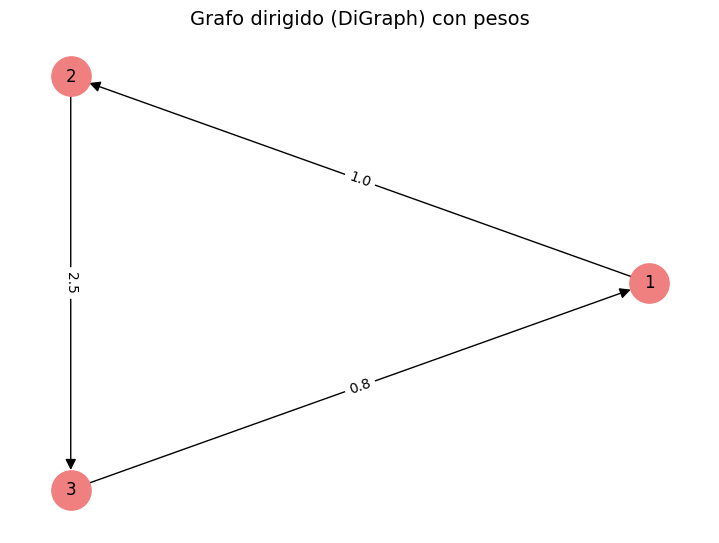

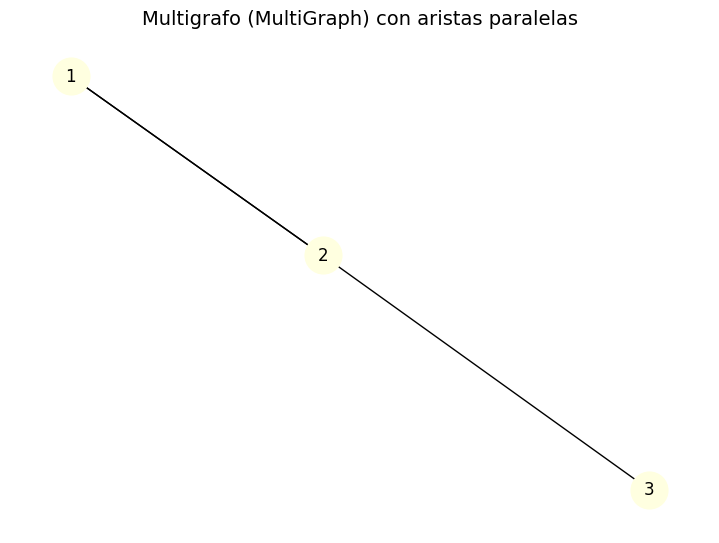

In [ ]:
# CELDA 9: Ejemplos de diferentes tipos de grafos

# --- Grafo dirigido con pesos ---
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1,2,1.0),(2,3,2.5),(3,1,0.8)])  # (u,v,weight)

plt.figure()
pos = nx.circular_layout(DG)
nx.draw(DG, pos, with_labels=True, node_color='lightcoral', node_size=800, arrowsize=16)
edge_labels = nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos, edge_labels=edge_labels, font_size=10)
plt.title('Grafo dirigido (DiGraph) con pesos')
plt.axis('off')
plt.show()

# --- Multigrafo (aristas paralelas) ---
MG = nx.MultiGraph()
MG.add_edges_from([(1,2),(1,2),(2,3)])  # la arista (1,2) aparece 2 veces
plt.figure()
pos = nx.spring_layout(MG, seed=5)
nx.draw(MG, pos, with_labels=True, node_color='lightyellow', node_size=700)
plt.title('Multigrafo (MultiGraph) con aristas paralelas')
plt.axis('off')
plt.show()


## 3) Análisis básico y algoritmos

Funciones importantes:
- `G.degree()` — grado de los nodos.
- `nx.to_numpy_array(G)` — matriz de adyacencia.
- `nx.shortest_path(G, source, target, weight=None)` — camino más corto (peso opcional).
- `nx.connected_components(G)` — componentes conexas (para grafos no dirigidos).


In [ ]:
# CELDA 11: Cálculos básicos en G (nuestro grafo simple con pesos)
# Grado (en grafo no dirigido)
print("Grado de cada nodo:", dict(G.degree()))

# Matriz de adyacencia (ordenada)
nodes_sorted = sorted(G.nodes())
A = nx.to_numpy_array(G, nodelist=nodes_sorted, weight=None)  # sin peso (0/1)
adj_df = pd.DataFrame(A, index=nodes_sorted, columns=nodes_sorted)
print("\nMatriz de adyacencia (0/1):")
display(adj_df.style.set_caption('Matriz de adyacencia (sin pesos)'))

# Camino más corto en número de aristas entre 'A' y 'D'
path_A_D = nx.shortest_path(G, 'A', 'D')  # por defecto sin peso -> minimiza número de aristas
print("\nCamino más corto (en aristas) entre A y D:", path_A_D)
print("Longitud (nº aristas):", nx.shortest_path_length(G, 'A', 'D'))

# Camino más corto con respecto a peso (Dijkstra)
path_A_D_weighted = nx.shortest_path(G, 'A', 'D', weight='weight')
length_weighted = nx.shortest_path_length(G, 'A', 'D', weight='weight')
print("\nCamino más corto ponderado (weight) entre A y D:", path_A_D_weighted)
print("Longitud ponderada:", length_weighted)

# Componentes conexas (G es conexo en este ejemplo)
print("\nComponentes conexas:", list(nx.connected_components(G)))


Grado de cada nodo: {'A': 2, 'B': 2, 'C': 2, 'D': 2}

Matriz de adyacencia (0/1):


,A,B,C,D
A,0.000000,1.000000,1.000000,0.000000
B,1.000000,0.000000,0.000000,1.000000
C,1.000000,0.000000,0.000000,1.000000
D,0.000000,1.000000,1.000000,0.000000



Camino más corto (en aristas) entre A y D: ['A', 'B', 'D']
Longitud (nº aristas): 2

Camino más corto ponderado (weight) entre A y D: ['A', 'C', 'D']
Longitud ponderada: 4.0

Componentes conexas: [{'C', 'B', 'A', 'D'}]


### Medidas de centralidad (resumen)

- **Centralidad de grado**: \(C_D(v)=\dfrac{\deg(v)}{n-1}\).
- **Centralidad de cercanía**: \(C_C(v)=\dfrac{n-1}{\sum_{u\neq v} d(v,u)}\).
- **Centralidad de intermediación (betweenness)**: número de caminos más cortos que pasan por \(v\) (normalizado).

NetworkX implementa:
`nx.degree_centrality`, `nx.closeness_centrality`, `nx.betweenness_centrality`.


In [ ]:
# CELDA 13: Cálculo de centralidades y presentación con pandas
deg_cent = nx.degree_centrality(G)
clos_cent = nx.closeness_centrality(G)
betw_cent = nx.betweenness_centrality(G)

df_cent = pd.DataFrame({
    'degree_centrality': deg_cent,
    'closeness_centrality': clos_cent,
    'betweenness_centrality': betw_cent
})
df_cent = df_cent.round(4).sort_values('degree_centrality', ascending=False)
df_cent.style.set_caption('Medidas de centralidad por nodo')


,degree_centrality,closeness_centrality,betweenness_centrality
A,0.666700,0.750000,0.166700
B,0.666700,0.750000,0.166700
C,0.666700,0.750000,0.166700
D,0.666700,0.750000,0.166700


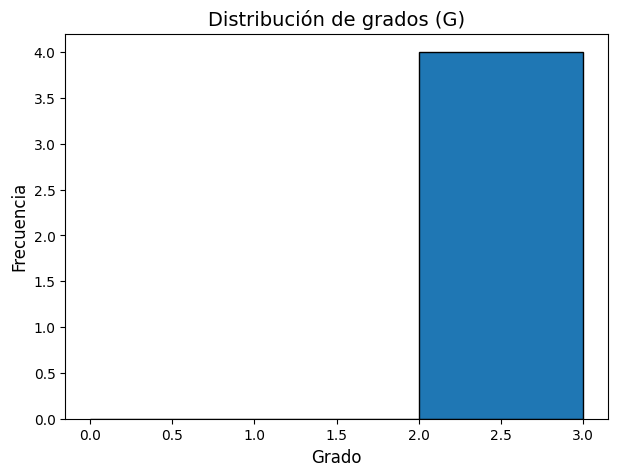

In [ ]:
# CELDA 14: Histograma de grados
degrees = [d for n,d in G.degree()]
plt.figure()
plt.hist(degrees, bins=range(0, max(degrees)+2), edgecolor='black')
plt.xlabel("Grado")
plt.ylabel("Frecuencia")
plt.title("Distribución de grados (G)")
plt.show()


## 4) Modelos de grafos aleatorios

Modelos útiles:
- **Erdős–Rényi G(n,p)**: `nx.erdos_renyi_graph(n,p)` → enlaces aleatorios con prob. p.
- **Barabási–Albert (BA)**: `nx.barabasi_albert_graph(n,m)` → attachment preferencial (scale-free).
- **Watts–Strogatz (WS)**: `nx.watts_strogatz_graph(n,k,p)` → small-world.

Los visualizaremos para comparar estructuras.


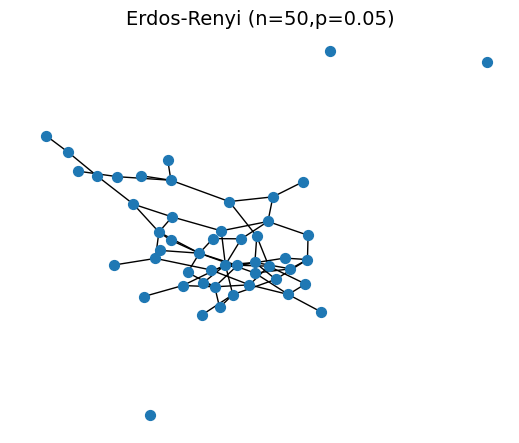

--- Erdos-Renyi (n=50,p=0.05) -> nodos: 50, aristas: 67


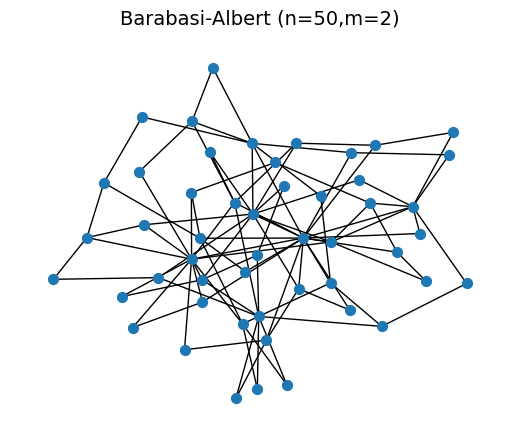

--- Barabasi-Albert (n=50,m=2) -> nodos: 50, aristas: 96


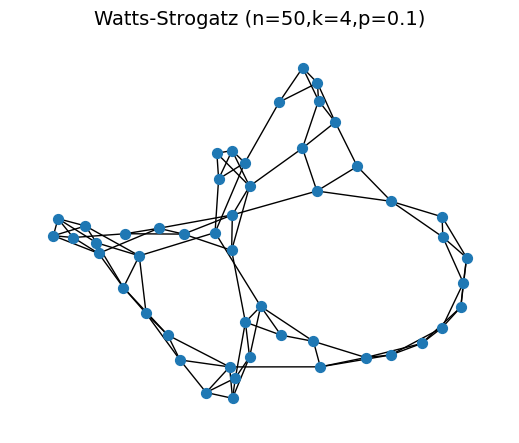

--- Watts-Strogatz (n=50,k=4,p=0.1) -> nodos: 50, aristas: 100


In [ ]:
# CELDA 16: Crear y mostrar tres modelos
models = {
    'Erdos-Renyi (n=50,p=0.05)': nx.erdos_renyi_graph(50, 0.05, seed=1),
    'Barabasi-Albert (n=50,m=2)': nx.barabasi_albert_graph(50, 2, seed=1),
    'Watts-Strogatz (n=50,k=4,p=0.1)': nx.watts_strogatz_graph(50, 4, 0.1, seed=1)
}

for title, graph in models.items():
    plt.figure(figsize=(5,4))
    pos = nx.spring_layout(graph, seed=2)
    nx.draw(graph, pos, node_size=50, with_labels=False)
    plt.title(title)
    plt.axis('off')
    plt.show()
    print(f"--- {title} -> nodos: {graph.number_of_nodes()}, aristas: {graph.number_of_edges()}")


## 5) Detección de comunidades (heurística)

Usaremos `greedy_modularity_communities` (algoritmo voraz para maximizar modularidad).  
Se obtendrá una partición (conjuntos de nodos). Colorearemos nodos según su comunidad.


Comunidades detectadas (listas de nodos): [['Carlos', 'Luis', 'Ana', 'Marta'], ['Sofía', 'Pedro', 'Diego']]


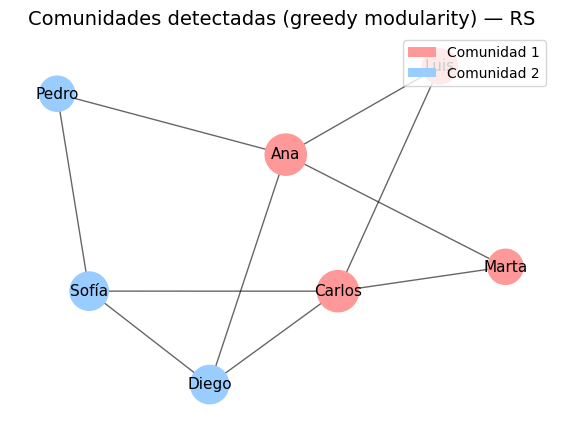

In [ ]:
# CELDA 18: Detección de comunidades y coloreado (ejemplo con una red social ficticia)
from networkx.algorithms import community

RS = nx.Graph()
RS.add_edges_from([
    ('Ana', 'Luis'), ('Ana', 'Marta'),
    ('Luis', 'Carlos'), ('Marta', 'Carlos'),
    ('Carlos', 'Sofía'), ('Sofía', 'Pedro'),
    ('Pedro', 'Ana'), ('Diego','Carlos'), ('Diego','Sofía'), ('Diego','Ana')
])

communities = list(community.greedy_modularity_communities(RS))
communities_list = [list(c) for c in communities]
print("Comunidades detectadas (listas de nodos):", communities_list)

# Asignar colores para cada comunidad
palette = ['#ff9999', '#99ccff', '#c2f0c2', '#ffcc99', '#d1c4e9']
color_map = {}
for i, comm in enumerate(communities_list):
    for node in comm:
        color_map[node] = palette[i % len(palette)]

node_colors = [color_map[n] for n in RS.nodes()]
sizes = [400 + 120*RS.degree(n) for n in RS.nodes()]  # tamaño ~ grado

plt.figure(figsize=(7,5))
pos = nx.spring_layout(RS, seed=3)
nx.draw_networkx_nodes(RS, pos, node_color=node_colors, node_size=sizes)
nx.draw_networkx_labels(RS, pos, font_size=11)
nx.draw_networkx_edges(RS, pos, alpha=0.6)
plt.title("Comunidades detectadas (greedy modularity) — RS")
plt.axis('off')

# Leyenda manual
from matplotlib.patches import Patch
legend_items = [Patch(facecolor=palette[i], label=f'Comunidad {i+1}') for i in range(len(communities_list))]
plt.legend(handles=legend_items, loc='upper right')
plt.show()


CREACION DE RED SOCIAL

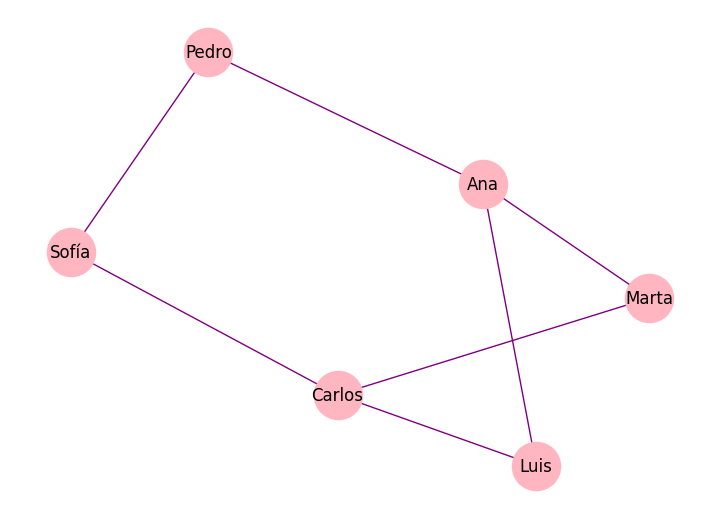

Grado de conexión de cada persona: {'Ana': 3, 'Luis': 2, 'Marta': 2, 'Carlos': 3, 'Sofía': 2, 'Pedro': 2}
Camino más corto entre Ana y Sofía: ['Ana', 'Pedro', 'Sofía']


In [ ]:
# Creamos una red social ficticia
RS = nx.Graph()
RS.add_edges_from([
    ("Ana", "Luis"), ("Ana", "Marta"),
    ("Luis", "Carlos"), ("Marta", "Carlos"),
    ("Carlos", "Sofía"), ("Sofía", "Pedro"),
    ("Pedro", "Ana")
])

plt.figure(figsize=(7,5))
nx.draw(RS, with_labels=True, node_color="lightpink", node_size=1200, font_size=12, edge_color="purple")
plt.show()

print("Grado de conexión de cada persona:", dict(RS.degree()))
print("Camino más corto entre Ana y Sofía:", nx.shortest_path(RS, "Ana", "Sofía"))


## 6) Caminos más cortos y matriz de distancias

Funciones:
- `nx.shortest_path(G, source, target, weight=None)` — devuelve la secuencia de nodos del camino más corto.
- `nx.shortest_path_length(G, source, target, weight=None)` — longitud (ponderada si weight='peso').
- `nx.all_pairs_shortest_path_length(G)` — distancias entre todos los pares.


In [ ]:
# CELDA 20: Caminos más cortos en la red RS
sp = nx.shortest_path(RS, 'Ana', 'Sofía')  # camino por defecto (en aristas)
length_sp = nx.shortest_path_length(RS, 'Ana', 'Sofía')
print("Camino más corto entre Ana y Sofía (en aristas):", sp)
print("Longitud (aristas):", length_sp)

# Matriz de distancias (diccionario -> DataFrame)
dist = dict(nx.all_pairs_shortest_path_length(RS))
dist_df = pd.DataFrame(dist).fillna(np.inf).astype(object)
dist_df.style.set_caption('Matriz de distancias (longitudes de caminos más cortos) — RS')


Camino más corto entre Ana y Sofía (en aristas): ['Ana', 'Pedro', 'Sofía']
Longitud (aristas): 2


,Ana,Luis,Marta,Carlos,Sofía,Pedro,Diego
Ana,0,1,1,2,2,1,1
Luis,1,0,2,1,2,2,2
Marta,1,2,0,1,2,2,2
Pedro,1,2,2,2,1,0,2
Diego,1,2,2,1,1,2,0
Carlos,2,1,1,0,1,2,1
Sofía,2,2,2,1,0,1,1


## 7) Matrices de adyacencia y formatos de guardado

- `nx.to_numpy_array(G)` -> matriz de adyacencia (numérica).
- Guardado: `nx.write_gexf(G, 'archivo.gexf')`, `nx.write_graphml(G, 'archivo.graphml')`, `nx.write_edgelist(G, 'archivo.edgelist')`.


In [ ]:
# CELDA 22: Matriz de adyacencia y guardado
nodes_sorted = sorted(RS.nodes())
A = nx.to_numpy_array(RS, nodelist=nodes_sorted)
adj_df = pd.DataFrame(A, index=nodes_sorted, columns=nodes_sorted)
display(adj_df.style.set_caption('Matriz de adyacencia (RS)'))

# Guardar en GEXF y GraphML (descargables desde Colab)
nx.write_gexf(RS, 'RS_red_social.gexf')
nx.write_graphml(RS, 'RS_red_social.graphml')
print("Archivos guardados: 'RS_red_social.gexf' y 'RS_red_social.graphml' en el directorio actual.")


,Ana,Carlos,Diego,Luis,Marta,Pedro,Sofía
Ana,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
Carlos,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
Diego,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Luis,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Marta,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pedro,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Sofía,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000


Archivos guardados: 'RS_red_social.gexf' y 'RS_red_social.graphml' en el directorio actual.


## 8) Coeficiente de clustering y otras medidas

- `nx.clustering(G)` -> clustering local por nodo.
- `nx.average_clustering(G)` -> clustering promedio.
- `nx.transitivity(G)` -> transitividad global (triángulos / tríadas conectadas).
- `nx.degree_pearson_correlation_coefficient(G)` -> assortatividad por grado.


In [ ]:
# CELDA 24: Clustering y otras medidas
print("Clustering por nodo:", nx.clustering(RS))
print("Clustering promedio:", nx.average_clustering(RS))
print("Transitivad global:", nx.transitivity(RS))
try:
    assort = nx.degree_pearson_correlation_coefficient(RS)
    print("Assortatividad (coef. Pearson entre grados):", assort)
except Exception as e:
    print("Error calculando assortativity:", e)


Clustering por nodo: {'Ana': 0, 'Luis': 0, 'Marta': 0, 'Carlos': 0.16666666666666666, 'Sofía': 0.3333333333333333, 'Pedro': 0, 'Diego': 0.3333333333333333}
Clustering promedio: 0.11904761904761904
Transitivad global: 0.14285714285714285
Assortatividad (coef. Pearson entre grados): -0.7391304347826088


### Ejercicio 1 (rutas ponderadas entre 6 ciudades)

Construye un grafo ponderado que represente rutas entre 6 ciudades:
Ciudades: A, B, C, D, E, F  
Rutas (con distancia en km):  
- A-B: 50, A-C: 120, B-C: 60, B-D: 140, C-E: 80, D-E: 70, D-F: 90, E-F: 60

Tareas:
1. Construir el grafo ponderado.
2. Calcular la ruta más corta (en distancia) entre A y F.
3. Mostrar la matriz de adyacencia con los pesos.
4. Graficar la red (anotar pesos en las aristas).


Aristas con pesos (distancias):
 - A <-> B : 50 km
 - A <-> C : 120 km
 - B <-> C : 60 km
 - B <-> D : 140 km
 - C <-> E : 80 km
 - D <-> E : 70 km
 - D <-> F : 90 km
 - E <-> F : 60 km

Camino más corto A -> F (ponderado): ['A', 'B', 'C', 'E', 'F']
Longitud total (km): 250


,A,B,C,D,E,F
A,0.000000,50.000000,120.000000,0.000000,0.000000,0.000000
B,50.000000,0.000000,60.000000,140.000000,0.000000,0.000000
C,120.000000,60.000000,0.000000,0.000000,80.000000,0.000000
D,0.000000,140.000000,0.000000,0.000000,70.000000,90.000000
E,0.000000,0.000000,80.000000,70.000000,0.000000,60.000000
F,0.000000,0.000000,0.000000,90.000000,60.000000,0.000000


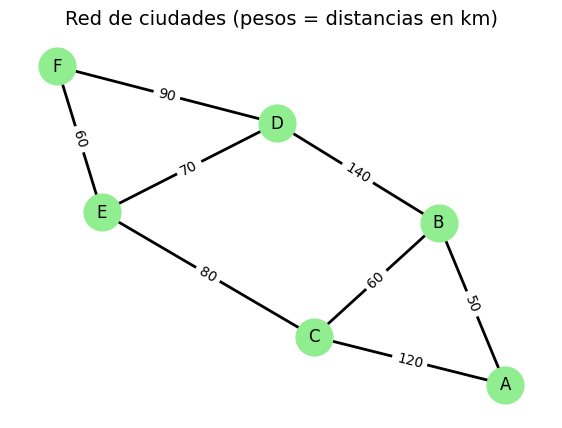

In [ ]:
# CELDA 29: Solución Ejercicio 1
cities = ["A","B","C","D","E","F"]
edges = [
    ("A","B",50), ("A","C",120), ("B","C",60), ("B","D",140),
    ("C","E",80), ("D","E",70), ("D","F",90), ("E","F",60)
]

Gcities = nx.Graph()
Gcities.add_weighted_edges_from(edges)

# 1) Mostrar aristas con pesos
print("Aristas con pesos (distancias):")
for u,v,w in Gcities.edges(data='weight'):
    print(f" - {u} <-> {v} : {w} km")

# 2) Ruta más corta A -> F (Dijkstra por peso)
path_A_F = nx.shortest_path(Gcities, "A", "F", weight='weight')
dist_A_F = nx.shortest_path_length(Gcities, "A", "F", weight='weight')
print("\nCamino más corto A -> F (ponderado):", path_A_F)
print("Longitud total (km):", dist_A_F)

# 3) Matriz de adyacencia con pesos
nodes_sorted = sorted(Gcities.nodes())
A_w = nx.to_numpy_array(Gcities, nodelist=nodes_sorted, weight='weight')
adjw_df = pd.DataFrame(A_w, index=nodes_sorted, columns=nodes_sorted)
display(adjw_df.style.set_caption('Matriz de adyacencia (pesos en km)'))

# 4) Visualizar grafo y pesos
plt.figure(figsize=(7,5))
pos = nx.spring_layout(Gcities, seed=10)
nx.draw_networkx_nodes(Gcities, pos, node_color='lightgreen', node_size=700)
nx.draw_networkx_labels(Gcities, pos)
nx.draw_networkx_edges(Gcities, pos, width=2)
edge_labels = nx.get_edge_attributes(Gcities, 'weight')
nx.draw_networkx_edge_labels(Gcities, pos, edge_labels=edge_labels)
plt.title("Red de ciudades (pesos = distancias en km)")
plt.axis('off')
plt.show()

# Explicación breve paso a paso (manual):
# Dijkstra evalúa rutas ponderadas: posibles rutas A->...->F y suma pesos.
# Ejemplo: A-B-D-F = 50 + 140 + 90 = 280 km
#          A-C-E-F = 120 + 80 + 60 = 260 km  <-- mejor opción en este caso
# El algoritmo devuelve A-C-E-F con distancia 260 km.
